# Polynomial regression - overfitting and underfitting

In [80]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
samples = 100
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**2 + 0.5*x + 3
y = f(X) + np.random.randn(samples,1)

f(X).shape, X.shape

((100, 1), (100, 1))

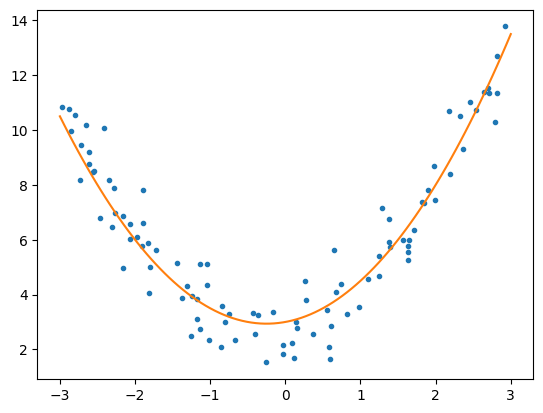

In [81]:
x = np.linspace(-3,3, 100).reshape(100,1)

plt.plot(X, y, '.')
plt.plot(x, f(x))

<Axes: title={'center': '$y = x^2 + 0.5*x + 3 +\\epsilon$'}, xlabel='x', ylabel='y'>

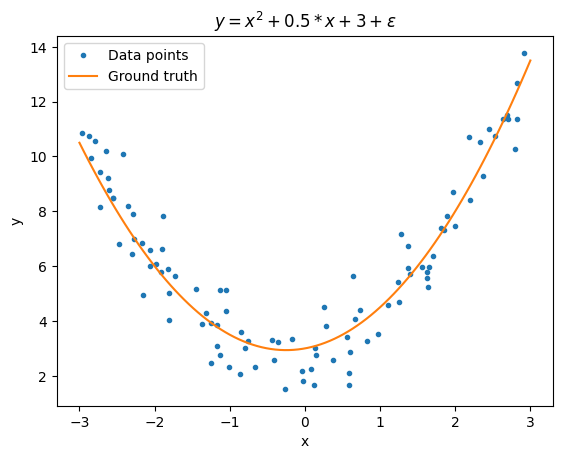

In [82]:
def draw_data():
    fig, ax = plt.figure(), plt.axes()
    ax.plot(X,y, '.', label = "Data points")
    x = np.linspace(-3, 3, samples).reshape(-1,1)

    ax.plot(x, f(x), label = "Ground truth")
    ax.set(title = r"$y = x^2 + 0.5*x + 3 +\epsilon$", xlabel = "x", ylabel = "y")
    ax.legend()

    return ax

draw_data()


## Polynomial regression

### Feature engineering

- constructing features artificially

In [83]:
from sklearn.preprocessing import PolynomialFeatures

poly_instance = PolynomialFeatures(degree = 2, include_bias=False) # include_bias = beta_0?

poly_features = poly_instance.fit_transform(X)
poly_features[:5], X[:5], X[:5]**2

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]),
 array([[0.56664654],
        [7.3131619 ],
        [1.93756281],
        [0.35040587],
        [4.25963433]]))

In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_features, y) # trained the model
model.coef_ # beta_1, beta_2

array([[0.43366893, 1.06456263]])

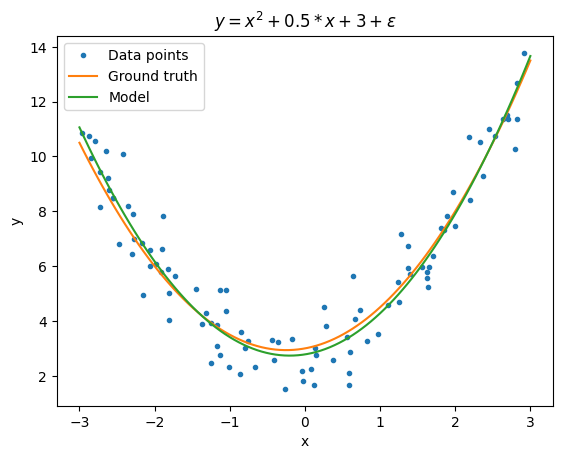

In [85]:
x = np.linspace(-3, 3, samples).reshape(-1,1) # test data
x_poly_features = poly_instance.transform(x)

y_pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, y_pred, label = "Model")
ax.legend()